In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [24]:
salaries = np.array([[20,1000],[27,1200],[21,2900],[37,1850],[46,900],
                        [53,950],[55,2000],[47,2100],[52,3000],[32,5900],
                        [39,4100],[41,5100],[39,7000],[48,5000],[48,6500]])

In [25]:
scaler = StandardScaler()
salaries = scaler.fit_transform(salaries)

In [26]:
salaries

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

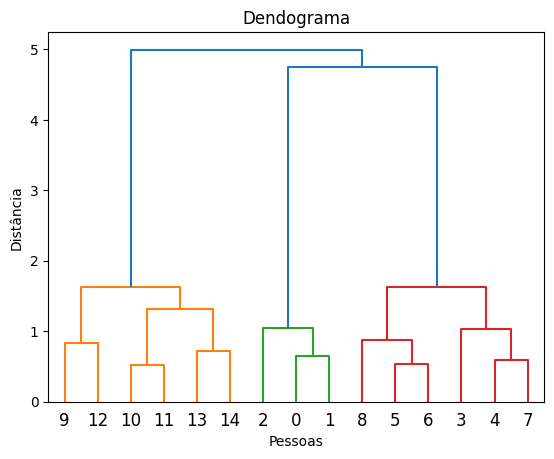

In [27]:
dendrogram = dendrogram(linkage(salaries, method='ward'));
plt.title("Dendograma")
plt.ylabel("Distância")
plt.xlabel("Pessoas");

In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
hc_salary = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')

In [30]:
labels = hc_salary.fit_predict(salaries)

In [31]:
labels

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

### Base cartão de crédito

In [32]:
df_credit_card = pd.read_csv('../data/credit_card_clients.csv', header=1)
df_credit_card

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [33]:
df_credit_card['BILL_TOTAL'] = df_credit_card['BILL_AMT1'] + df_credit_card['BILL_AMT2'] + df_credit_card['BILL_AMT3'] + df_credit_card['BILL_AMT4'] + df_credit_card['BILL_AMT5'] + df_credit_card['BILL_AMT6']

In [52]:
df_credit_card.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0  ...          0          0         0       689         0         0   
1  ...       3455       3261         0      1000      1000      1000   
2  ...      14948      15549      1518      1500      1000      1000   
3  ...      28959      29547      2000      2019      1200      1100   
4  ...      19146      19131      2000     36681     10000      9000   

   PAY_AMT5  PAY_AMT6  default payment next month  BILL_TOTAL  
0         0         0                           1        7704  
1         0      2000                           1       17077  
2      1000      5000                           0      101653  
3      1069      1000                           0      231334  
4       689       679                           0      109339  

[5 rows x 26 columns]

In [54]:
#cria um numpy array somente com a 1 e última coluna
X = df_credit_card.iloc[:, [1, 25]].values
X

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]], shape=(30000, 2))

In [55]:
#normaliza os dados
X = scaler.fit_transform(X)

In [36]:
X

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]], shape=(30000, 2))

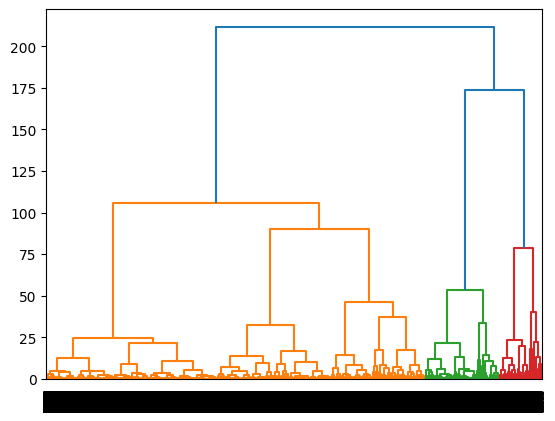

In [39]:
dendogram2 = dendrogram(linkage(X, method='ward'))

In [40]:
hc_card = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')

In [41]:
hc_card

AgglomerativeClustering(n_clusters=3)

In [42]:
labels = hc_card.fit_predict(X)
labels

array([0, 0, 0, ..., 0, 0, 0], shape=(30000,))

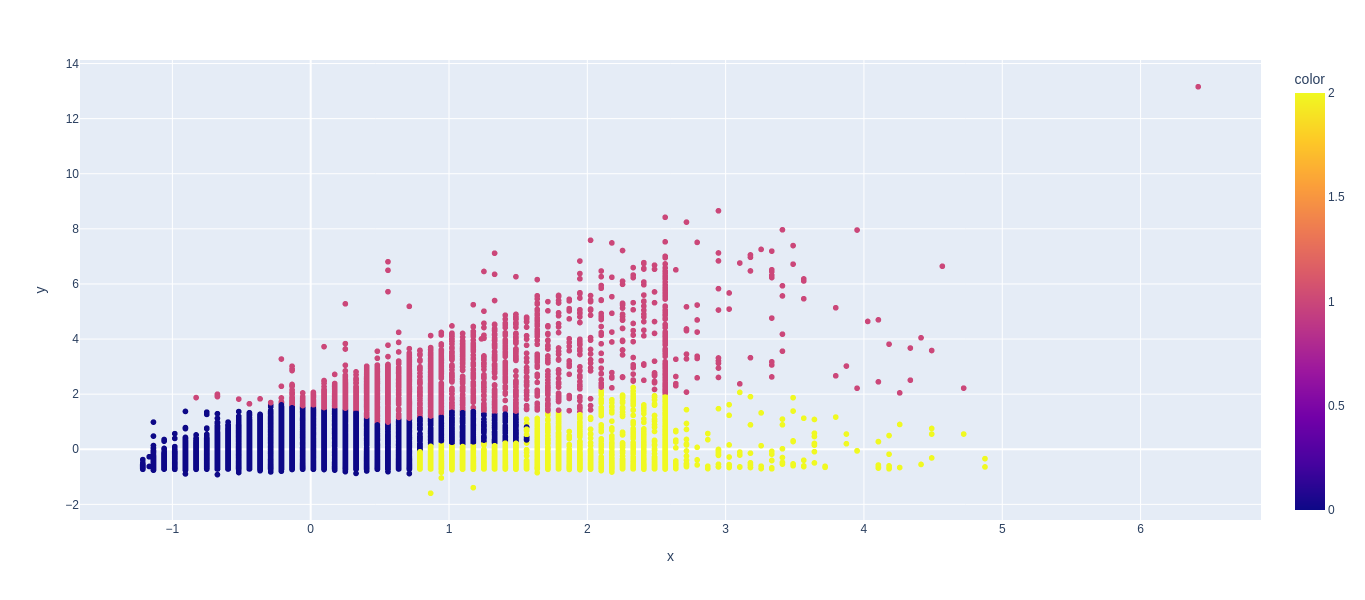

In [50]:
g_card = px.scatter(x = X[:,0], y = X[:,1], color = labels, height=600, width=1000)
g_card.show()
# Eixo X - limite 
# Eixo Y - gasto

### DBSCAN

In [56]:
from sklearn.cluster import DBSCAN

In [79]:
dbscan = DBSCAN(eps=0.37, min_samples=5) #raio, min_vizinhos
labels = dbscan.fit_predict(X)

In [80]:
labels

array([0, 0, 0, ..., 0, 0, 0], shape=(30000,))

In [82]:
# -1 são registros que o algoritmo não conseguiu classificar
# É necessário alterar os parâmetros

#conclusão: 3 grupos, com as contagens abaixo
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2]), array([   52, 29920,    18,    10]))

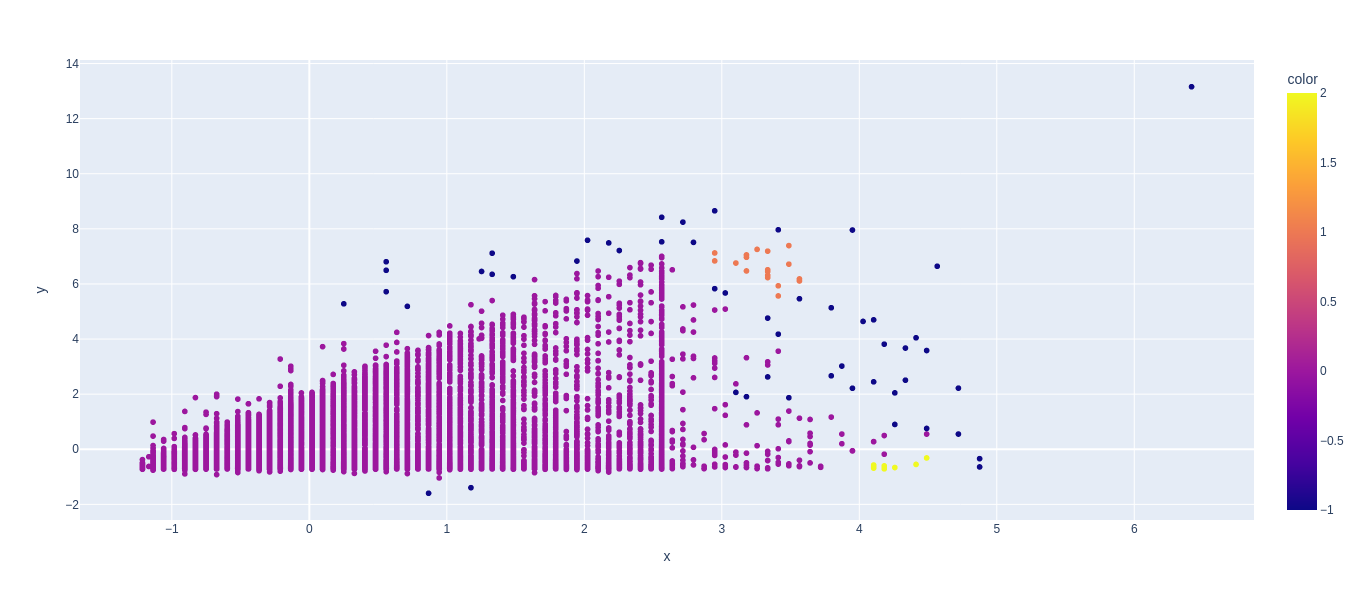

In [85]:
g = px.scatter(x = X[:,0], y = X[:,1], color = labels, height=600, width=1000)
g.show()